# GRU(LSTM）による異常検知

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, GRU,LSTM

In [19]:
from scipy import signal
#ヒストグラム　
def gethist(lst,range=(0,10),bins=25):
    win= signal.hann(len(lst)) 
    hist, bins= np.histogram(win*lst, bins, range)
    return hist, bins

In [23]:
def segdata(lst, dim): #lst:１次元系列　dim:セグメントの幅
    segs = np.empty((0,dim), float)#0×dimの空配列
    hists = np.empty((0,25), float)#0×dimの空配列
    for i in range(lst.size - dim + 1):#1つづつずらしながらセグメントをつくっている。最後のセグメントの開始点は lst.size-dim
        hist,bins= gethist(lst[i:i+dim])
        
        seg=np.array(lst[i:i+dim][::-1].reshape((1,-1))) #セグメントの切り出し，時系列反転，appendのための2次ベクトル化
        hist=hist.reshape((1,-1))
        hists = np.append(hists,hist,axis=0)
        segs = np.append(segs,seg,axis=0)

    return segs, hists

In [26]:
from scipy import fftpack
from scipy import signal
def getdata():
  #!wget "www.dropbox.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt" #ローカルにコピーしてくる
  LEN=3000  #分析区間

  SP=0         #学習用データの開始点
  AP=3000   #テスト用データの開始点　個のデータの場合 4250ポイント付近に異常がある
  data = np.loadtxt("ipynbs/qtdbsel102.txt",delimiter="\t")
  print("データ数:",data.shape[0],"  次元数:",data.shape[1])

  #元データは3次元の時系列，3次のデータ(indexとしては2)を指定して学習/テストデータに分割
  train_org = data[SP:SP+LEN, 2]      #学習用データとして 1～2999サンプル区間を使用
  test_org  = data[AP:AP+LEN, 2]    #テスト用データとして3000～5999サンプルを使用
  
  #x軸
  x=np.arange(SP,SP+LEN)

  return x, train_org, test_org

No handles with labels found to put in legend.


データ数: 45000   次元数: 3


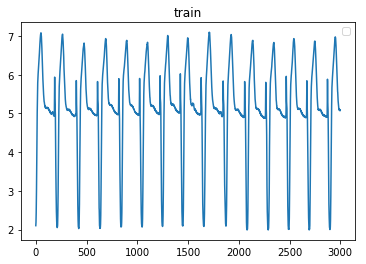

No handles with labels found to put in legend.


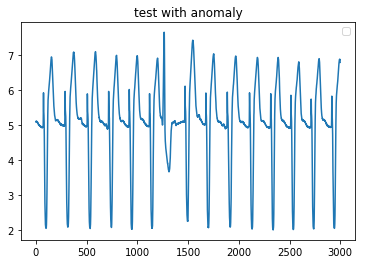

In [27]:
x, train_org, test_org = getdata()

plt.plot(x,train_org)
plt.title("train")
plt.legend()
plt.show()
plt.plot(x,test_org)
plt.title("test with anomaly")
plt.legend()
plt.show()

In [59]:
x_base = train_org
a_base = test_org

timesteps = 300 #過去300サンプルに対して次の１サンプルを予測する

x = np.empty(0, dtype=np.float32)
a = np.empty(0, dtype=np.float32)

for i in range(1):
    x = np.hstack([x, x_base])

xdata = np.array([x[i:i+timesteps] for i in range(len(x)-timesteps)])
xdata = xdata.reshape(xdata.shape[0], timesteps, -1)
ydata = x[timesteps:].reshape(xdata.shape[0], -1)


for i in range(1):
    a = np.hstack([a, a_base])
adata = np.array([a[i:i+timesteps] for i in range(len(a)-timesteps)])
adata = adata.reshape(adata.shape[0], timesteps, -1)

zdata = a[timesteps:].reshape(adata.shape[0], -1)

In [38]:
actfunc = "tanh"

model = Sequential()
model.add(LSTM(10, activation=actfunc, 
               batch_input_shape=(None, timesteps, 1)))
model.add(Dense(10, activation=actfunc))
model.add(Dense(1))

In [60]:
model.compile(optimizer='sgd',
              loss='mean_squared_error')

history = model.fit(xdata, ydata,
                    batch_size=100,
                    epochs=200,
                    verbose=1)

Epoch 1/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0062
Epoch 2/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0063
Epoch 3/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0062
Epoch 4/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0119
Epoch 5/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0062
Epoch 6/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0063
Epoch 7/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0109
Epoch 8/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0079
Epoch 9/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0092
Epoch 10/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0072
Epoch 11/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0104
Epoch 12/200
2700/2700 [==============================] - 5s 2ms/step - lo

2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 98/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0081
Epoch 99/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0051
Epoch 100/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0102
Epoch 101/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 102/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0051
Epoch 103/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 104/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0048
Epoch 105/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 106/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 107/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0089
Epoch 108/200
2700/2700 [==============================] - 6s 2ms/step

2700/2700 [==============================] - 5s 2ms/step - loss: 0.0055
Epoch 193/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 194/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0088
Epoch 195/200
2700/2700 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 196/200
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0048
Epoch 197/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 198/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0051
Epoch 199/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0061
Epoch 200/200
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0056


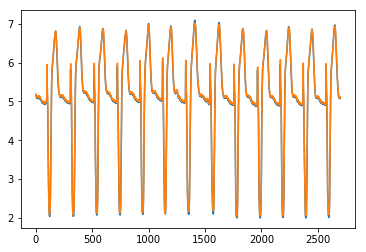

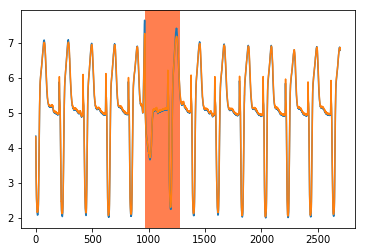

In [68]:
pred = model.predict(xdata)
plt.plot(ydata)
plt.plot(pred)
diff=abs(pred-ydata)
outlier_rows = [i for i in range(len(diff)) if diff[i]>0.6]
for c in outlier_rows:
    plt.axvspan(c, c+timesteps, color = "skyblue")
plt.show()

pred = model.predict(adata)
plt.plot(zdata)
plt.plot(pred)
diff=abs(pred-zdata)
outlier_rows = [i for i in range(len(diff)) if diff[i]>0.6]
for c in outlier_rows:
    plt.axvspan(c, c+timesteps, color = "coral")
plt.show()

plt.show()


#ig, ax = plt.subplots()
#ax.plot(ydata[:3000, :].reshape(-1))
#ax.plot(pred[:3000, :].reshape(-1))

#plt.show()